In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.google_flight_analysis.scrape import *

In [4]:
orig_array = np.array([
    [0, 480],
    [10, 390],
    [20, 280],
    [30, 200],
    [40, 254],
    [50, 110],
    [60, 96],
    [70, 116],
    [80, 200],
    [90, 270],
    [100, 300],
    [110, 150],
    [120, 130],
    [130, 260],
    [140, 299],
    [150, 260],
    [160, 260],
    [170, 270],
    [180, 250],
    [190, 255],
    [200, 255]
])

In [5]:
step_size = 5

new_rows = []
for i in range(orig_array.shape[0]-1):
    start = orig_array[i, 0]
    end = orig_array[i+1, 0]
    
    # Check the multiples of 5 in between
    for x in range(start+step_size, end, step_size):
        # Generate a random y value in the range of the two points
        y = np.random.randint(min(orig_array[i, 1], orig_array[i+1, 1]), max(orig_array[i, 1], orig_array[i+1, 1]) + 1)
        new_rows.append([x, y])

# Convert list of new rows to a numpy array
new_rows = np.array(new_rows)

# Concatenate the original array with the new rows
final_array = np.concatenate((orig_array, new_rows))

# Sort the final array by the first column
final_array = final_array[final_array[:, 0].argsort()]
final_array

array([[  0, 480],
       [  5, 395],
       [ 10, 390],
       [ 15, 309],
       [ 20, 280],
       [ 25, 274],
       [ 30, 200],
       [ 35, 203],
       [ 40, 254],
       [ 45, 142],
       [ 50, 110],
       [ 55, 109],
       [ 60,  96],
       [ 65, 110],
       [ 70, 116],
       [ 75, 143],
       [ 80, 200],
       [ 85, 211],
       [ 90, 270],
       [ 95, 281],
       [100, 300],
       [105, 263],
       [110, 150],
       [115, 131],
       [120, 130],
       [125, 161],
       [130, 260],
       [135, 280],
       [140, 299],
       [145, 299],
       [150, 260],
       [155, 260],
       [160, 260],
       [165, 261],
       [170, 270],
       [175, 251],
       [180, 250],
       [185, 252],
       [190, 255],
       [195, 255],
       [200, 255]])

In [8]:
# convert array to dataframe
df = pd.DataFrame(final_array[:, 1], index=final_array[:,0], columns=["original"])

n_simulations = 7

# simulate prices with some noise
for i in range(n_simulations):
    noise_scale = np.random.randint(15, 30)
    noise = np.random.normal(loc=0, scale=noise_scale, size=df.shape[0])
    noised_data = df.original + noise
    df["day_" + str(i+1)] = noised_data
  
# compute mean of simulations
df["avg"] = df.mean(axis=1)

# compute the price category based on the quantiles
df["price_cat"] = pd.qcut(df["avg"], q=[0, 0.25, 0.75, 1], labels=["low", "average", "high"])

df

TypeError: unsupported operand type(s) for +: 'float' and 'str'

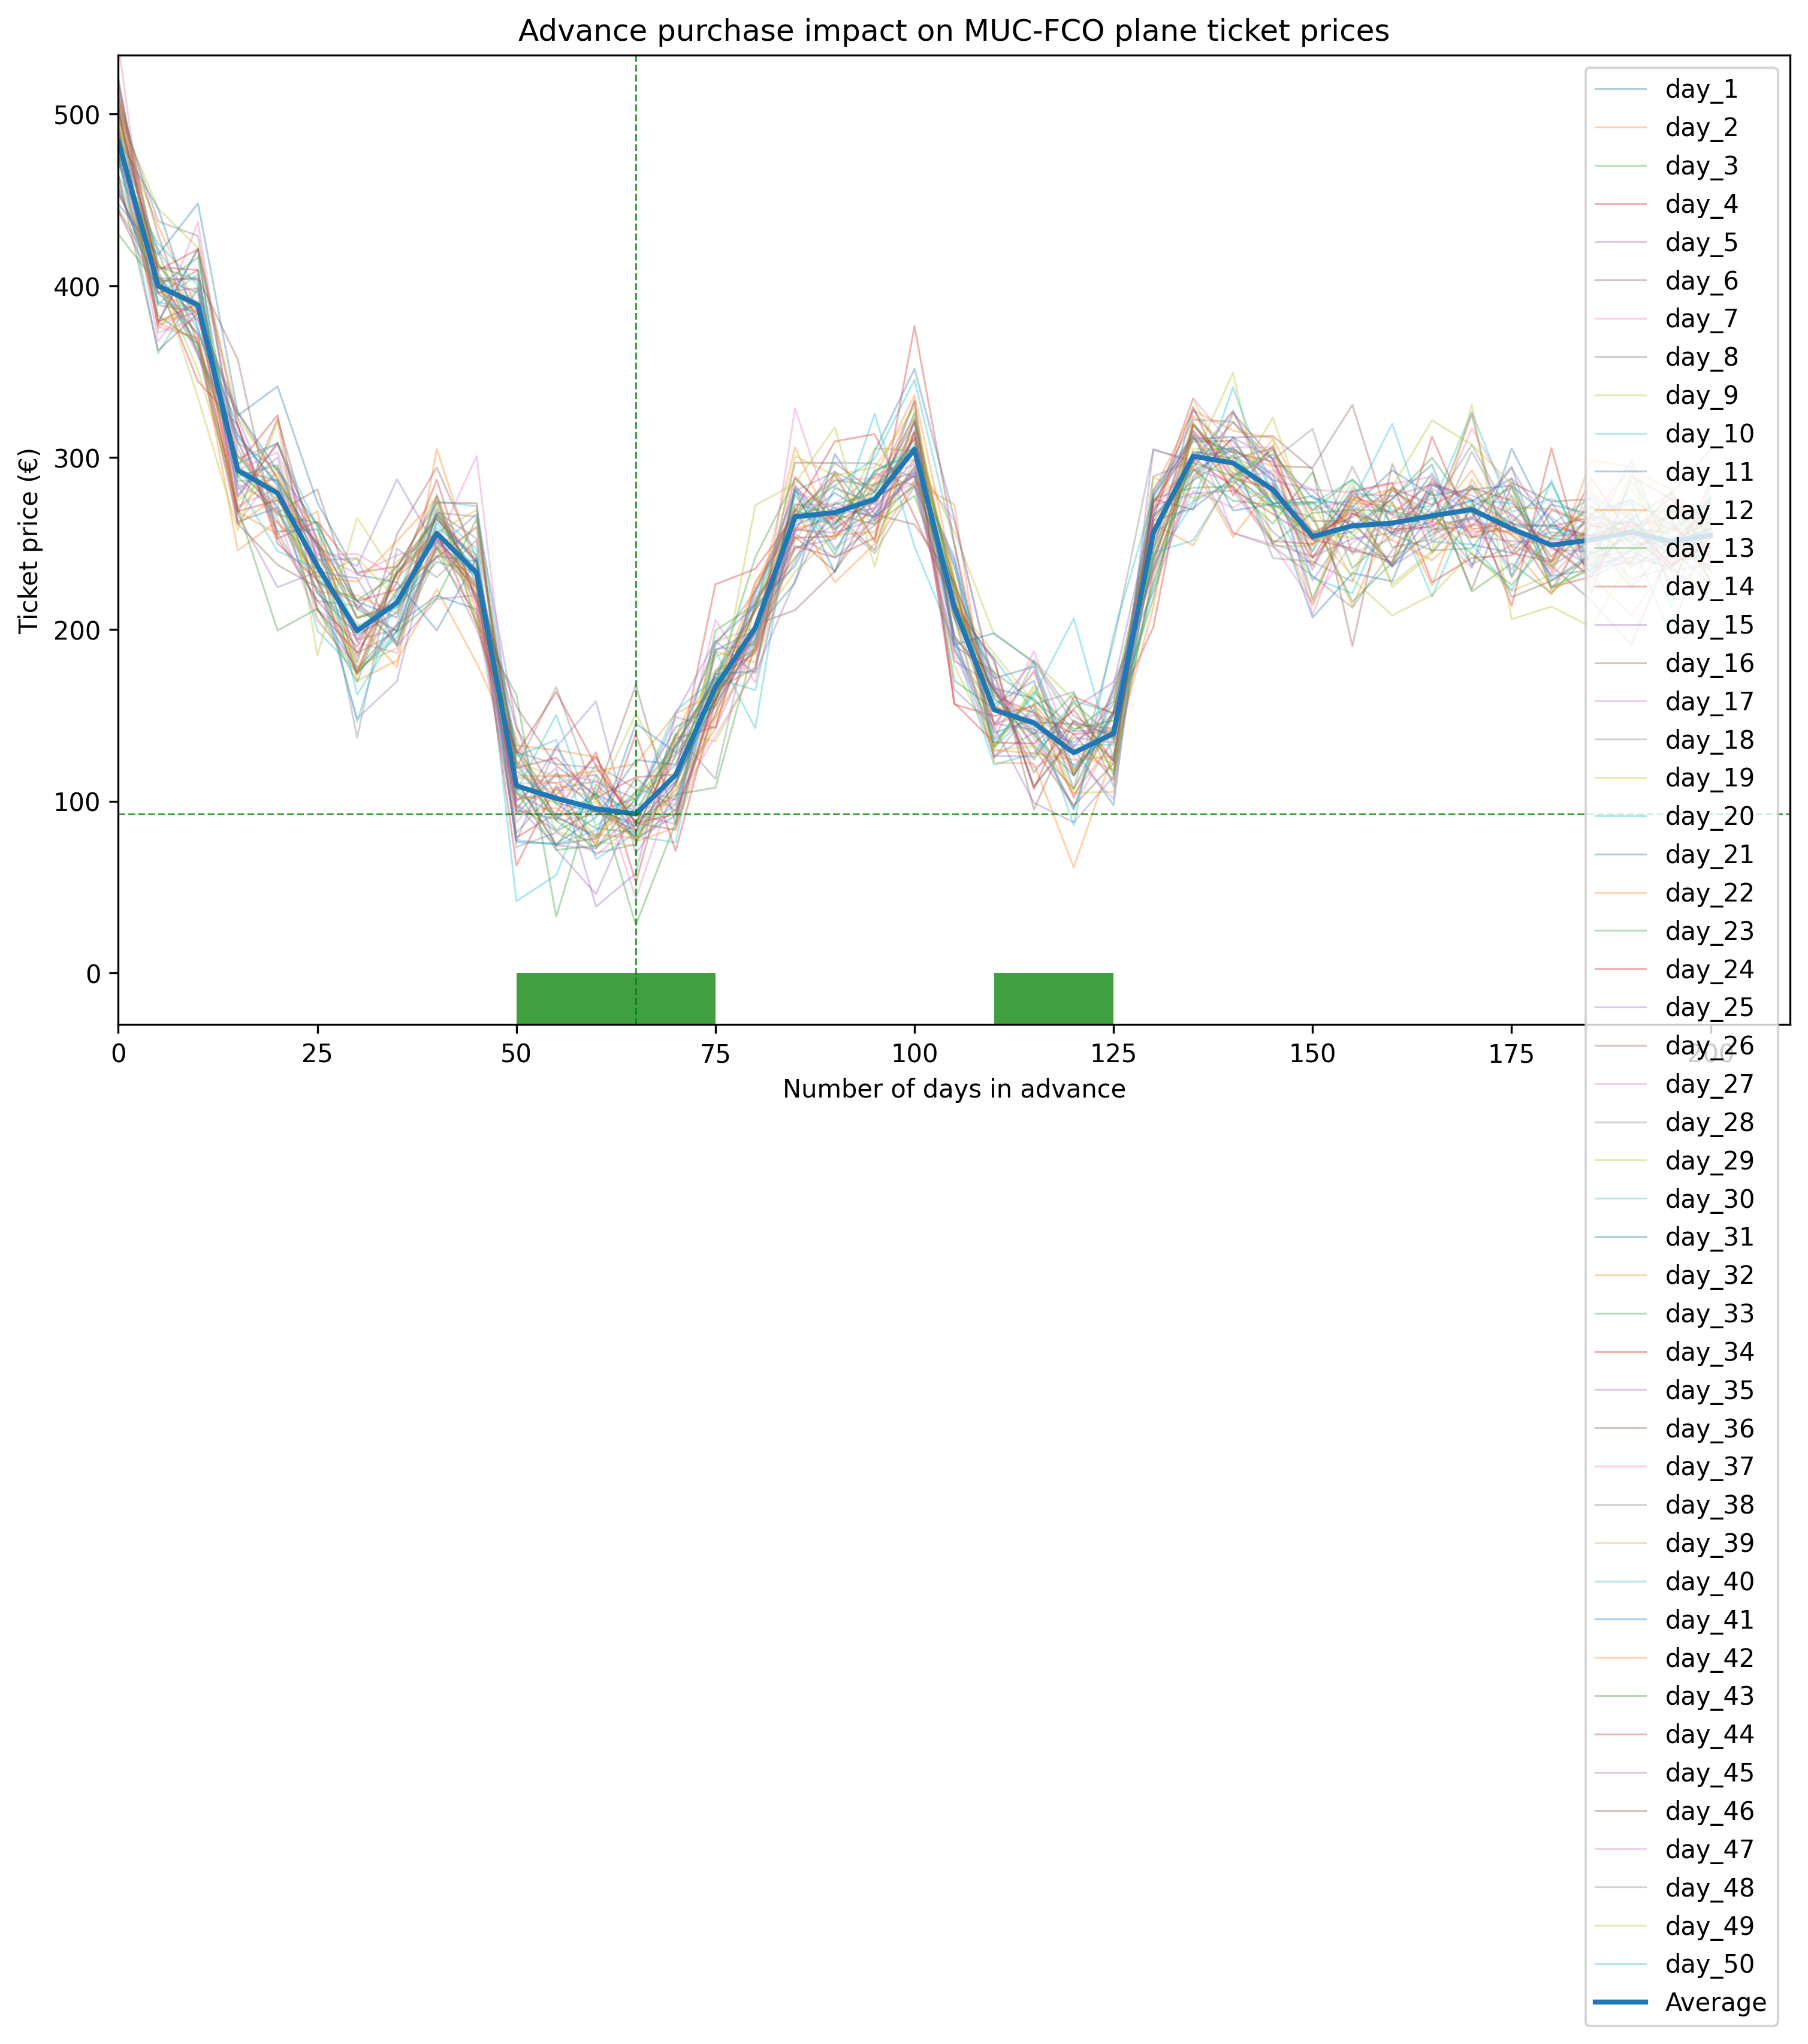

In [26]:
fig, ax = plt.subplots(figsize=(12, 7), dpi=300)

df.filter(regex='day_').plot(ax=ax, alpha=0.35, linewidth=0.75)
df["avg"].plot(ax=ax, label="Average", linewidth=2)

plt.axhline(df.avg.min(), color="green", linestyle='dashed', linewidth=.75, alpha=.75)
plt.axvline(df.avg.idxmin(), color="green", linestyle='dashed', linewidth=.75, alpha=.75)


ax.set_xlabel("Number of days in advance")
ax.set_ylabel("Ticket price (€)")

ax.set_xlim(left=0); ax.set_ylim(-30, df.avg.max() + 50) 

ax.fill_between(df.index, -30, 0, where=df["price_cat"] == "low", facecolor='green', alpha=0.75)

plt.title("Advance purchase impact on MUC-FCO plane ticket prices")

plt.legend()